In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv("./dataset/archive/housing.csv")

#Data Exploration

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
data.dropna(inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [64]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
train_data = x_train.join(y_train)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

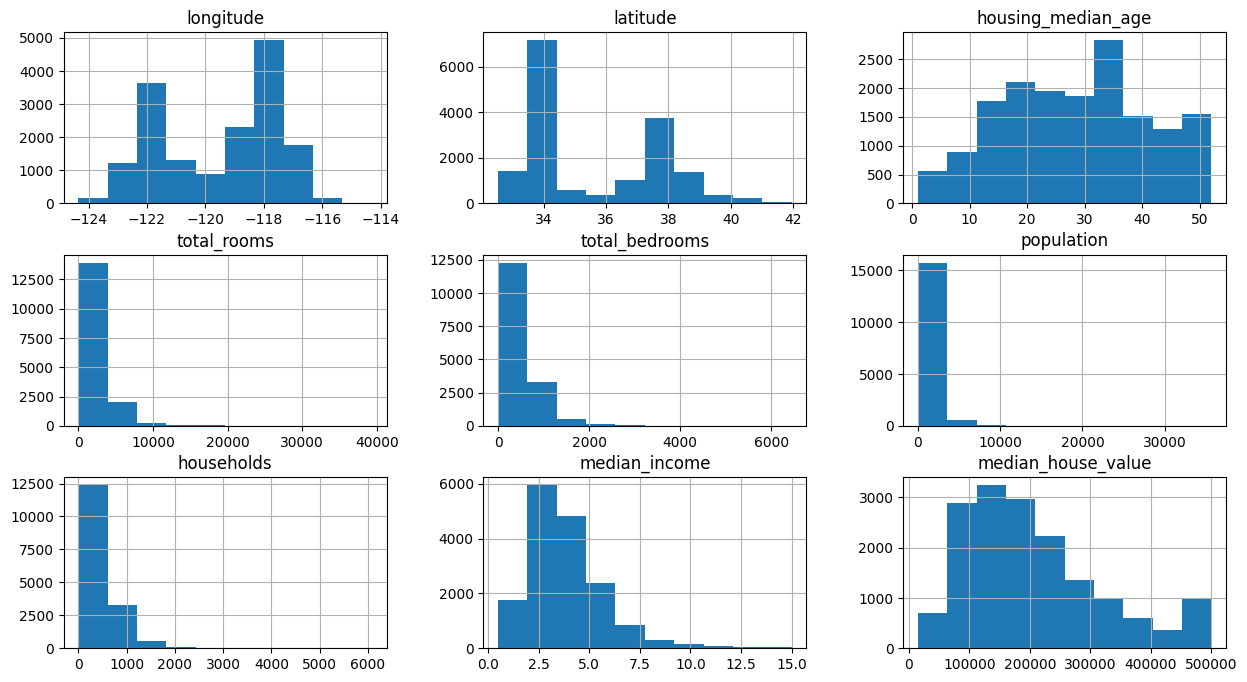

In [67]:
train_data.hist(figsize=(15,8))

In [68]:
train_data.corr()

C:\Users\kmest\AppData\Local\Temp\ipykernel_30824\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924468,-0.106329,0.036847,0.063073,0.092638,0.049918,-0.018799,-0.043259
latitude,-0.924468,1.000000,0.008917,-0.029918,-0.062443,-0.103101,-0.066890,-0.077290,-0.148035
housing_median_age,-0.106329,0.008917,1.000000,-0.357823,-0.314824,-0.290199,-0.297077,-0.118500,0.108044
total_rooms,0.036847,-0.029918,-0.357823,1.000000,0.929064,0.853976,0.919030,0.193720,0.132430
total_bedrooms,0.063073,-0.062443,-0.314824,0.929064,1.000000,0.875296,0.980527,-0.013739,0.048333
population,0.092638,-0.103101,-0.290199,0.853976,0.875296,1.000000,0.904330,-0.001585,-0.028987
households,0.049918,-0.066890,-0.297077,0.919030,0.980527,0.904330,1.000000,0.007005,0.062645
median_income,-0.018799,-0.077290,-0.118500,0.193720,-0.013739,-0.001585,0.007005,1.000000,0.689403
median_house_value,-0.043259,-0.148035,0.108044,0.132430,0.048333,-0.028987,0.062645,0.689403,1.000000


C:\Users\kmest\AppData\Local\Temp\ipykernel_30824\3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

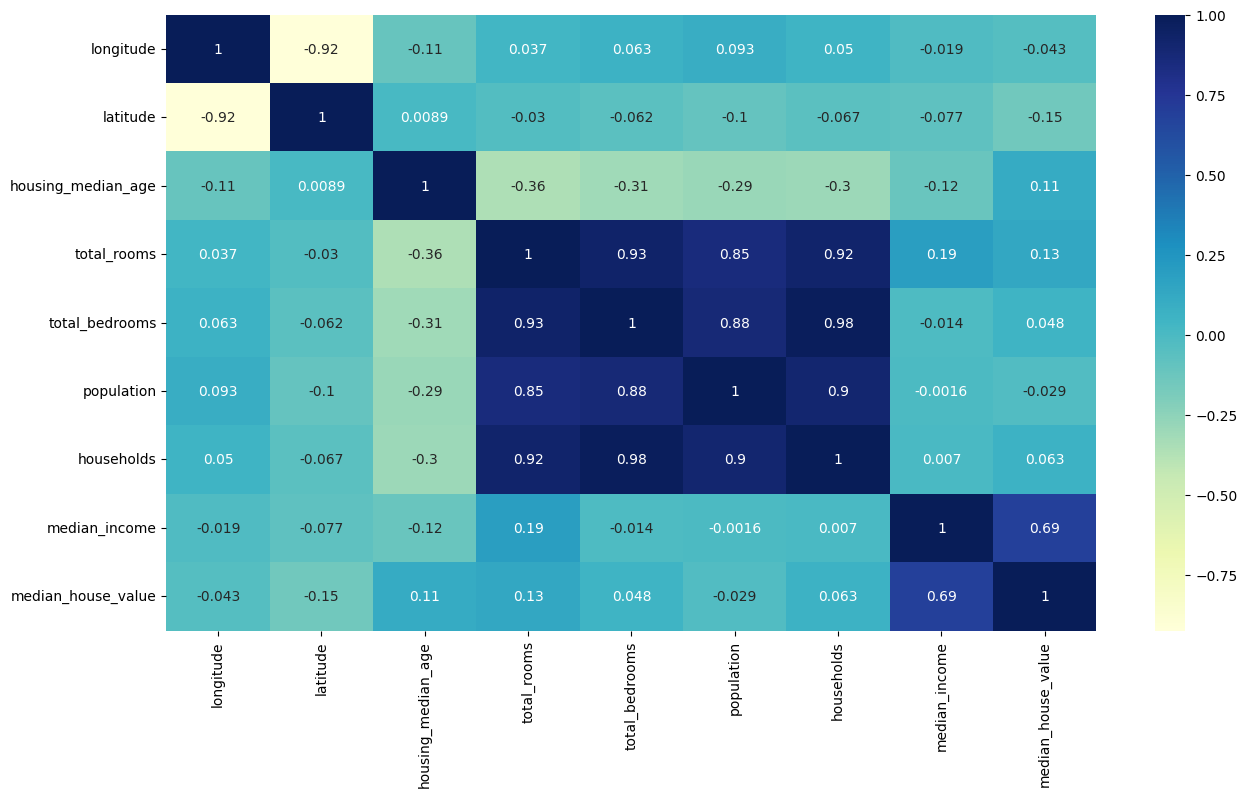

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#Data Preprocessing

In [70]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

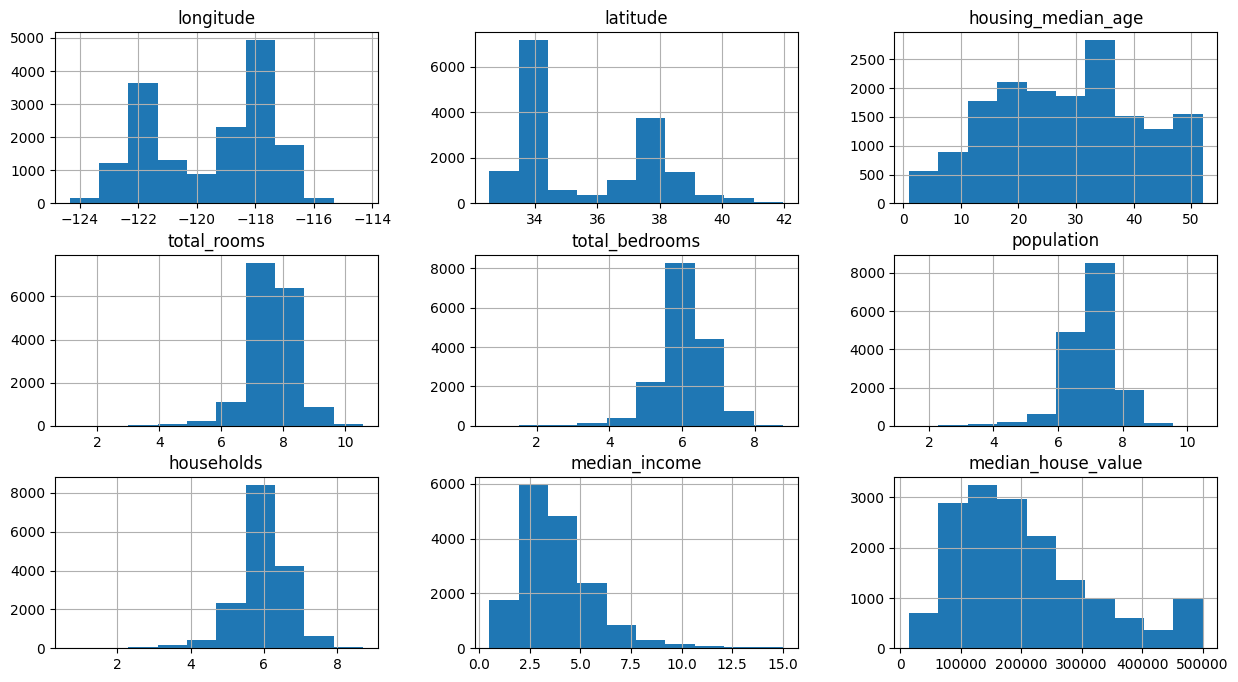

In [71]:
train_data.hist(figsize=(15,8))

In [72]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3439,-118.41,34.27,38.0,6.755769,5.318120,7.131699,5.323010,2.9219,<1H OCEAN,137900.0
5076,-118.32,33.98,49.0,7.597898,6.102559,6.959399,5.978886,2.2138,<1H OCEAN,119800.0
11788,-121.24,38.79,23.0,7.258412,5.568345,6.561031,5.598422,3.1875,INLAND,110200.0
3287,-122.69,39.04,9.0,5.541264,3.931826,4.204693,3.401197,2.7639,INLAND,112500.0
18003,-121.99,37.27,27.0,7.985484,6.210600,7.282761,6.238325,5.4051,<1H OCEAN,273500.0
...,...,...,...,...,...,...,...,...,...,...
16069,-122.49,37.75,47.0,7.669028,6.054439,7.008505,5.996452,3.7054,NEAR OCEAN,308500.0
14222,-117.04,32.66,22.0,8.120589,6.447306,7.294377,6.418365,4.1442,NEAR OCEAN,303900.0
12270,-117.06,34.00,33.0,7.362645,5.789960,6.779922,5.645447,2.5357,INLAND,94400.0
19505,-121.03,37.64,22.0,7.601902,5.961005,7.327123,5.961005,3.1480,INLAND,102300.0


In [73]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7202
INLAND        5245
NEAR OCEAN    2073
NEAR BAY      1822
ISLAND           4
Name: ocean_proximity, dtype: int64

In [74]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3439,1,0,0,0,0
5076,1,0,0,0,0
11788,0,1,0,0,0
3287,0,1,0,0,0
18003,1,0,0,0,0
...,...,...,...,...,...
16069,0,0,0,0,1
14222,0,0,0,0,1
12270,0,1,0,0,0
19505,0,1,0,0,0


In [75]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3439,-118.41,34.27,38.0,6.755769,5.318120,7.131699,5.323010,2.9219,<1H OCEAN,137900.0,1,0,0,0,0
5076,-118.32,33.98,49.0,7.597898,6.102559,6.959399,5.978886,2.2138,<1H OCEAN,119800.0,1,0,0,0,0
11788,-121.24,38.79,23.0,7.258412,5.568345,6.561031,5.598422,3.1875,INLAND,110200.0,0,1,0,0,0
3287,-122.69,39.04,9.0,5.541264,3.931826,4.204693,3.401197,2.7639,INLAND,112500.0,0,1,0,0,0
18003,-121.99,37.27,27.0,7.985484,6.210600,7.282761,6.238325,5.4051,<1H OCEAN,273500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16069,-122.49,37.75,47.0,7.669028,6.054439,7.008505,5.996452,3.7054,NEAR OCEAN,308500.0,0,0,0,0,1
14222,-117.04,32.66,22.0,8.120589,6.447306,7.294377,6.418365,4.1442,NEAR OCEAN,303900.0,0,0,0,0,1
12270,-117.06,34.00,33.0,7.362645,5.789960,6.779922,5.645447,2.5357,INLAND,94400.0,0,1,0,0,0
19505,-121.03,37.64,22.0,7.601902,5.961005,7.327123,5.961005,3.1480,INLAND,102300.0,0,1,0,0,0


In [76]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [77]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3439,-118.41,34.27,38.0,6.755769,5.318120,7.131699,5.323010,2.9219,137900.0,1,0,0,0,0
5076,-118.32,33.98,49.0,7.597898,6.102559,6.959399,5.978886,2.2138,119800.0,1,0,0,0,0
11788,-121.24,38.79,23.0,7.258412,5.568345,6.561031,5.598422,3.1875,110200.0,0,1,0,0,0
3287,-122.69,39.04,9.0,5.541264,3.931826,4.204693,3.401197,2.7639,112500.0,0,1,0,0,0
18003,-121.99,37.27,27.0,7.985484,6.210600,7.282761,6.238325,5.4051,273500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16069,-122.49,37.75,47.0,7.669028,6.054439,7.008505,5.996452,3.7054,308500.0,0,0,0,0,1
14222,-117.04,32.66,22.0,8.120589,6.447306,7.294377,6.418365,4.1442,303900.0,0,0,0,0,1
12270,-117.06,34.00,33.0,7.362645,5.789960,6.779922,5.645447,2.5357,94400.0,0,1,0,0,0
19505,-121.03,37.64,22.0,7.601902,5.961005,7.327123,5.961005,3.1480,102300.0,0,1,0,0,0


<AxesSubplot: >

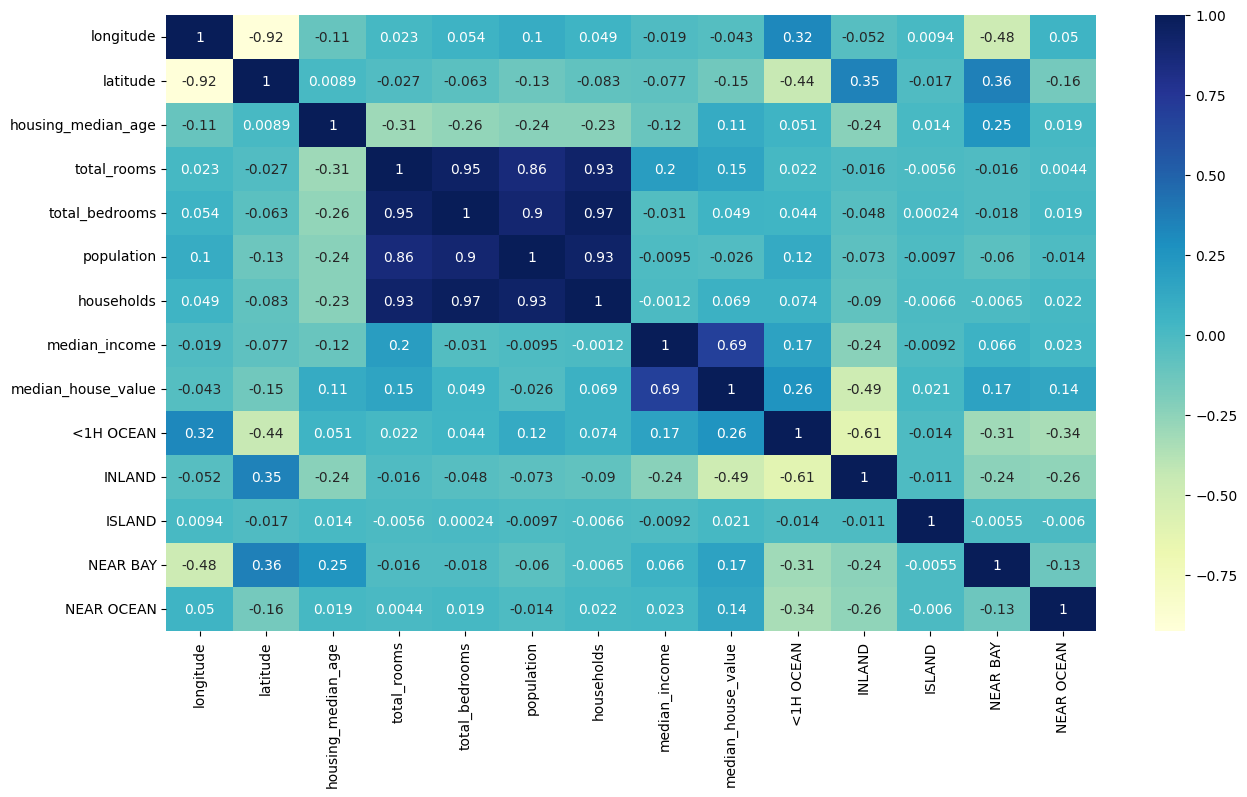

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#Feature Engineering

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

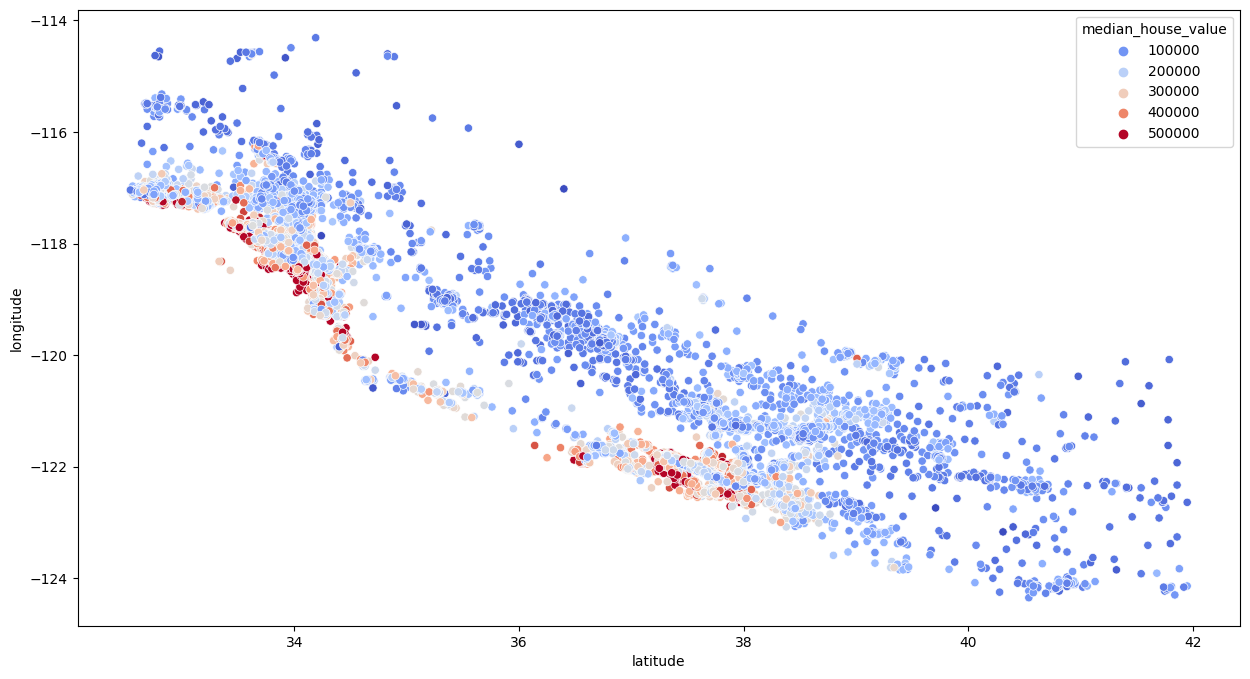

In [79]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [80]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot: >

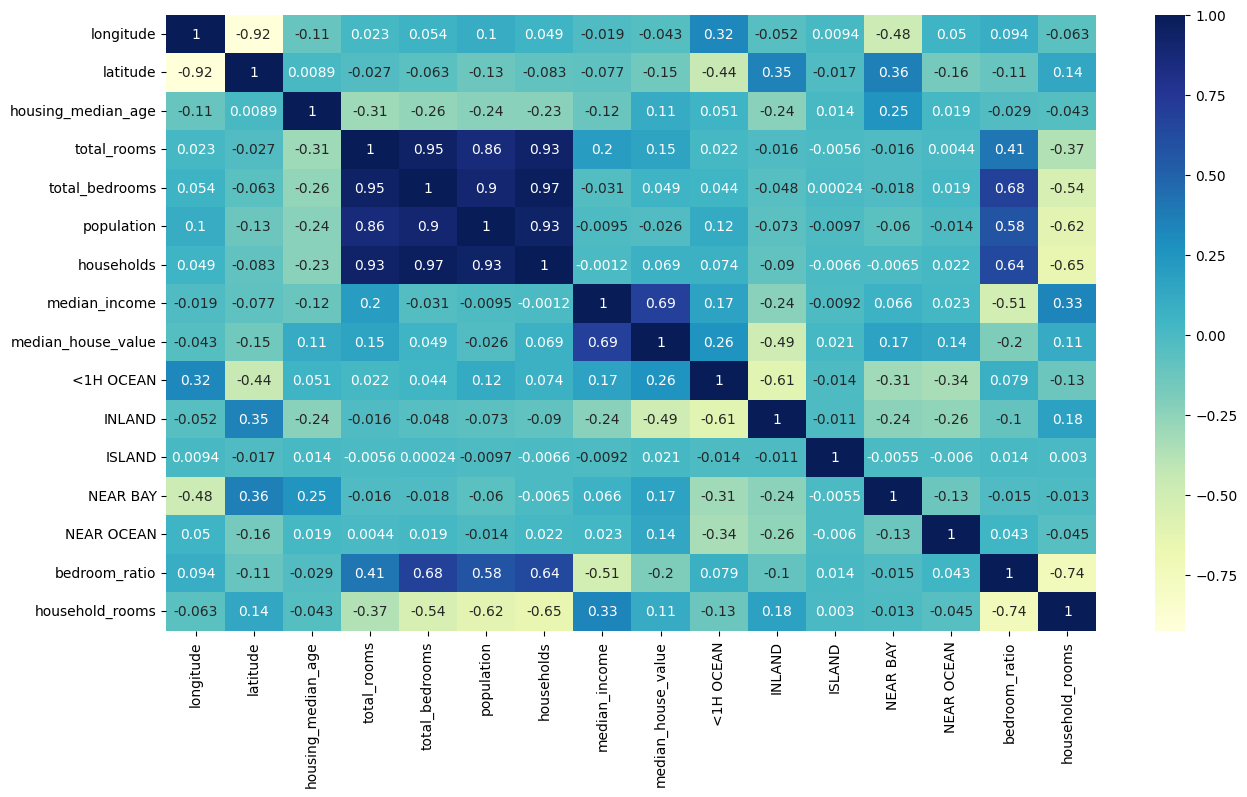

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#Training Models

#Linear Regression Models

In [82]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

#Generating Test Score

In [83]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [84]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [85]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16257,-121.25,37.97,34.0,7.161622,5.843544,6.741701,5.683580,1.7895,63100.0,0,1,0,0,0,0.815953,1.260055
10223,-117.89,33.88,27.0,7.645876,5.820083,6.945051,5.808142,5.7519,243400.0,1,0,0,0,0,0.761206,1.316406
19386,-120.85,37.77,37.0,7.461066,6.001415,6.842683,5.905362,2.4717,77100.0,0,1,0,0,0,0.804364,1.263439
12528,-121.49,38.56,35.0,7.327781,6.126869,6.895683,6.122493,1.9013,86900.0,0,1,0,0,0,0.836115,1.196862
18319,-122.12,37.43,33.0,8.090402,6.505784,7.252762,6.440947,5.3160,398100.0,0,0,0,1,0,0.804136,1.256089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8548,-118.34,33.88,42.0,6.587550,5.214936,6.202536,5.153292,3.2589,233300.0,1,0,0,0,0,0.791635,1.278319
10817,-117.95,33.63,17.0,8.816705,7.344719,7.896925,7.336937,3.9917,271600.0,1,0,0,0,0,0.833046,1.201687
10439,-117.60,33.45,4.0,7.770645,6.340359,6.904751,6.077642,5.4031,243800.0,0,0,0,0,1,0.815937,1.278562
407,-122.27,37.89,52.0,8.021913,5.924256,6.883463,5.902633,8.8342,430500.0,0,0,0,1,0,0.738509,1.359040


In [86]:
reg.score(x_test, y_test)

0.6553270487328133

In [ ]:
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train, y_train)
"""

In [ ]:
#x_test_s = scaler.transform(x_test)

In [ ]:
#reg.score(x_test_s, y_test)

#Random Forest Models

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [88]:
forest.score(x_test, y_test)

0.8117909709552564

#Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
#Max trees used for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#Max trees used for hyper parameter tuning with optimum depth
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": [8, 12, 20],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

In [95]:
best_forest = grid_search.best_estimator_

#Generating score post hyper parameter tuning

In [96]:
best_forest.score(x_test, y_test)

0.8130143687348892